In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [10]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))
driver.get("https://www.weather.go.kr/w/weather/forecast/short-term.do")
driver.implicitly_wait(1)

temps = driver.find_element(By.ID, "my-tchart").text
temps = [int(ele) for ele in temps.replace("℃", "").split("\n")]

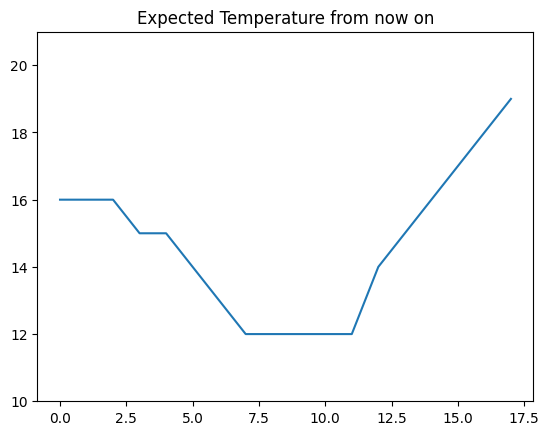

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# y축 범위 지정
plt.ylim(min(temps) - 2, max(temps) + 2)

# 제목 지정
plt.title("Expected Temperature from now on")

# x축: Elapesed Time(경과시간)
# y축: 기온
sns.lineplot(
    x = [time for time in range(len(temps))],
    y = temps
)

plt.show()